## Importing Library

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import PIL
import tensorflow as tf
import pathlib
import glob
import cv2

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split



The input provided to the notebook is present in  as given structure(file directories)
- /kaggle/input/flower-photos-by-the-tensorflow-team/
    - flower_photos
        - /tulips
        - /daisy
        - /dandelion
        - /roses
        - /sunflowers

## Loading Dataset

In [3]:
main_dir = '/kaggle/input/flower-photos-by-the-tensorflow-team/flower_photos/'
data_dir = pathlib.Path(main_dir).with_suffix('')
image_cnt = len(list(data_dir.glob('*/*.jpg')))
print('Total images Present: ',image_cnt)

Total images Present:  3670


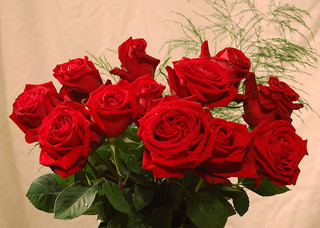

In [4]:
#visualinzing some images
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[1]))

In [5]:
#creating dataset
batch_size = 32
img_height = 180
img_width = 180

In [6]:
data_dir = {
    'tulips':list(data_dir.glob('tulips/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'roses':list(data_dir.glob('roses/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*'))
}

In [7]:
class_labels = {
    'tulips':0,
    'daisy':1,
    'dandelion':2,
    'roses':3,
    'sunflowers':4
}

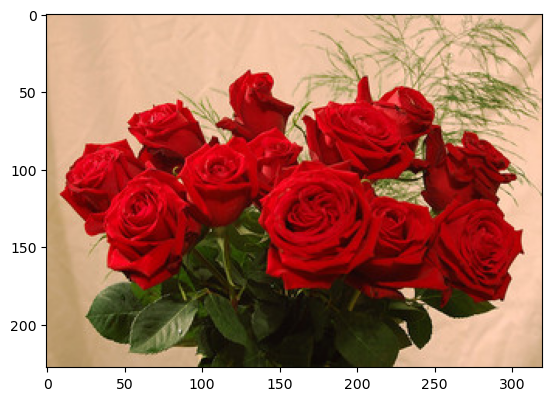

In [8]:
img = PIL.Image.open(data_dir['roses'][1])
img = np.asarray(img)
plt.imshow(img.astype('uint8'))

<Figure size 1000x1000 with 0 Axes>

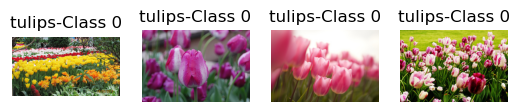

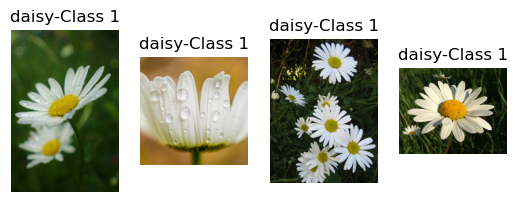

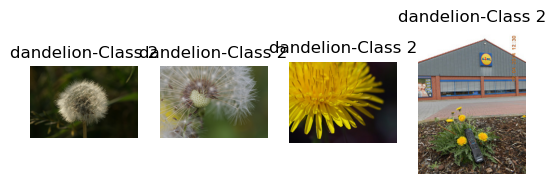

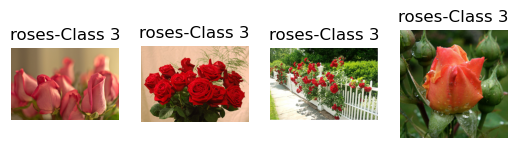

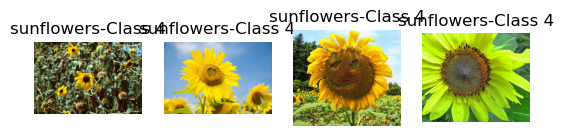

In [9]:
plt.figure(figsize = (10,10))
for flower in data_dir.keys():
    plt.figure()
    for i in range(4):
        axis = plt.subplot(1,4,i+1)
        img = np.asarray(PIL.Image.open(data_dir[flower][i]))
        plt.imshow(img.astype('uint8'))
        plt.title(f'{flower}-Class {class_labels[flower]}')
        plt.axis('off')
        

In [10]:
#creating X and y dataset
X=[]
y=[]

for flower, images in data_dir.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(class_labels[flower])


In [11]:
len(X) , len(y)

(3670, 3670)

In [12]:
X = np.array(X)
y = np.array(y)

In [13]:
#train-test-split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42)

In [14]:
X_train.shape

(2752, 180, 180, 3)

In [15]:
X_test.shape

(918, 180, 180, 3)

In [16]:
#scaling the images
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

In [17]:
X_train_scaled[1]

array([[[0.3254902 , 0.33333333, 0.37647059],
        [0.74901961, 0.7254902 , 0.78823529],
        [0.55294118, 0.57254902, 0.66666667],
        ...,
        [0.92941176, 0.83137255, 0.84705882],
        [0.9372549 , 0.85098039, 0.87058824],
        [0.93333333, 0.82745098, 0.85882353]],

       [[0.31764706, 0.3254902 , 0.36862745],
        [0.76862745, 0.74117647, 0.80784314],
        [0.58823529, 0.6       , 0.69411765],
        ...,
        [0.90980392, 0.81176471, 0.83137255],
        [0.90980392, 0.84313725, 0.84313725],
        [0.9254902 , 0.84313725, 0.84313725]],

       [[0.31764706, 0.32156863, 0.36470588],
        [0.78823529, 0.75686275, 0.82352941],
        [0.61568627, 0.61960784, 0.71764706],
        ...,
        [0.90980392, 0.80392157, 0.82745098],
        [0.90588235, 0.83137255, 0.83921569],
        [0.92156863, 0.83921569, 0.84313725]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

In [18]:
#Building simple CNN
num_classes = 5
model = Sequential([
    #cnn model
    layers.Conv2D(8,3,padding = 'same',activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,3,padding = 'same',activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding = 'same',activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding = 'same',activation = 'relu'),
    layers.MaxPooling2D(),
    
    #dense model
    layers.Flatten(),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ['accuracy'])
model.fit(X_train_scaled,y_train, epochs = 20)

Epoch 1/20
86/86 [==============================] - 14s 17ms/step - loss: 1.2522 - accuracy: 0.4629
Epoch 2/20
86/86 [==============================] - 1s 16ms/step - loss: 1.0269 - accuracy: 0.5828
Epoch 3/20
86/86 [==============================] - 2s 19ms/step - loss: 0.9156 - accuracy: 0.6377
Epoch 4/20
86/86 [==============================] - 1s 14ms/step - loss: 0.8166 - accuracy: 0.6904
Epoch 5/20
86/86 [==============================] - 1s 14ms/step - loss: 0.7306 - accuracy: 0.7213
Epoch 6/20
86/86 [==============================] - 1s 14ms/step - loss: 0.6390 - accuracy: 0.7533
Epoch 7/20
86/86 [==============================] - 1s 14ms/step - loss: 0.5523 - accuracy: 0.7936
Epoch 8/20
86/86 [==============================] - 1s 14ms/step - loss: 0.4434 - accuracy: 0.8361
Epoch 9/20
86/86 [==============================] - 1s 14ms/step - loss: 0.3599 - accuracy: 0.8735
Epoch 10/20
86/86 [==============================] - 1s 14ms/step - loss: 0.2655 - accuracy: 0.9092
Epoch 11

In [19]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 16ms/step - loss: 2.2839 - accuracy: 0.6688


[2.283874034881592, 0.6688452959060669]

**We can observed that after 20 epoch the model accuracy on training data was amlost more than 99% but on test data the accuracy is very poor i.e 66.88% so The model is higly overfitting**

In [38]:
#predicting some image
simple_cnn_predict = model.predict(X_test_scaled)

score = tf.nn.softmax(simple_cnn_predict[0])
index = np.argmax(score)
actual = y_test[0]
print(f'Actual image class : {list(class_labels.keys())[actual]}')
print(f'Model predicted    : {list(class_labels.keys())[index]}')

29/29 [==============================] - 0s 10ms/step
Actual image class : tulips
Model predicted    : tulips


In [39]:
#predicting some image

score = tf.nn.softmax(simple_cnn_predict[13])
index = np.argmax(score)
actual = y_test[13]
print(f'Actual image class : {list(class_labels.keys())[actual]}')
print(f'Model predicted    : {list(class_labels.keys())[index]}')

Actual image class : tulips
Model predicted    : roses


In [ ]:
#perfroming data agumentation